# Set everything up

In [1]:
from init_catdog_convnet import *
from init_catdog_notebooks import *
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics

In [2]:
TEST_DIR = '/run/media/verena/SAMSUNG/Data/kaggle-cats-vs-dogs/data/test' 
PET_PHOTOS = '/run/media/verena/SAMSUNG/Data/pets_data/all' # my own pet photos

# Load model

In [3]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

INFO:tensorflow:Restoring parameters from /home/verena/Repos/phd/cat-dog-classifier/dogsvscats-0.001-2conv-basic.model
model loaded!


# Run on test set

In [4]:
test_data = process_test_data(test_dir=TEST_DIR)

100%|██████████| 222/222 [00:01<00:00, 188.19it/s]


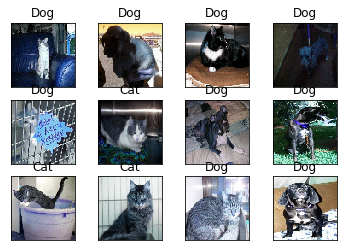

In [5]:
fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [6]:
predictions_test=np.zeros(len(test_data))
truth_test=np.zeros(len(test_data))

In [7]:
for num,data in enumerate(test_data):
    # cat: [1,0]
    # dog: [0,1]
    img_num = data[1]
    img_data = data[0]
    
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    label_true = img_num.split('_')[0]
    if label_true == 'dog':
        truth_test[num] = 1
    elif label_true == 'cat':
        truth_test[num] = 0 
    else:
        raise ValueError('Unknown class label')
    
    if model_out[1] > 0.5:
        predictions_test[num] = 1
    else:
        predictions_test[num] = 0

In [8]:
confm_test = sklearn.metrics.confusion_matrix(truth_test, predictions_test)

# Run on my own data

In [9]:
pet_data = process_test_data(test_dir=PET_PHOTOS)

100%|██████████| 719/719 [00:58<00:00, 12.23it/s]


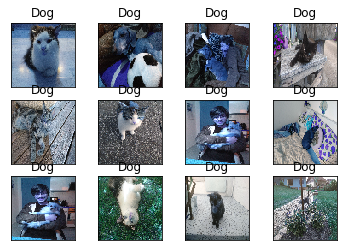

In [10]:
fig=plt.figure()

for num,data in enumerate(pet_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [11]:
predictions_pets=np.zeros(len(pet_data))
truth_pets=np.zeros(len(pet_data))

In [15]:
for num,data in enumerate(pet_data):
    # cat: [1,0]
    # dog: [0,1]
    img_num = data[1]
    img_data = data[0]
    
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    label_true = img_num.split('_')[0]
    if label_true == 'dog' or label_true == 'dogs':
        truth_pets[num] = 1
    elif label_true == 'cat' or label_true == 'cats':
        truth_pets[num] = 0 
    else:
        raise ValueError('Unknown class label')
    
    if model_out[1] > 0.5:
        predictions_pets[num] = 1
    else:
        predictions_pets[num] = 0

In [16]:
confm_pets = sklearn.metrics.confusion_matrix(truth_pets, predictions_pets)

## Comparison of data sets

In [17]:
confm_test

array([[ 36,  75],
       [  1, 110]])

In [18]:
sklearn.metrics.accuracy_score(truth_test, predictions_test)

0.65765765765765771

In [19]:
confm_pets

array([[ 33, 278],
       [ 11, 397]])

In [20]:
sklearn.metrics.accuracy_score(truth_pets, predictions_pets)

0.59805285118219753

# Analyse single samples

In [34]:
def analyse_sample(dataset, idx):
    img_data = dataset[idx][0]
    plt.imshow(img_data)
    plt.show()
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    model_out = model.predict([data])[0]
    label = 0
    label_name = "cat"
    if model_out[1] > 0.5:
        label = 1
        label_name = "dog"
    print("label: ", dataset[idx][1], "prediction:", label_name)

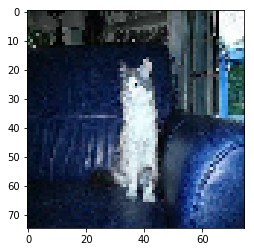

label:  cat prediction: dog


In [35]:
analyse_sample(test_data, 0)

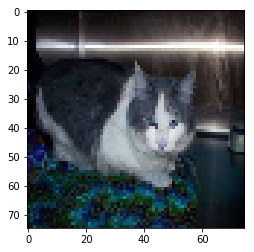

label:  cat prediction: cat


In [23]:
analyse_sample(test_data, 5)

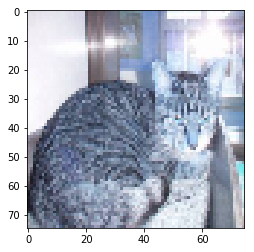

label:  cat prediction: dog


In [24]:
analyse_sample(test_data, 10)

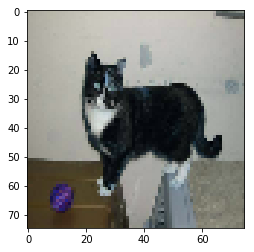

label:  cat prediction: dog


In [25]:
analyse_sample(test_data, 15)

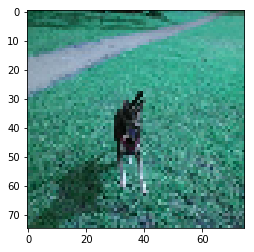

label:  dog prediction: dog


In [26]:
analyse_sample(test_data, 20)

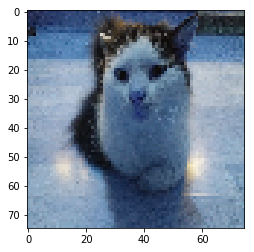

label:  cats_IMG_20170724_192232 prediction: dog


In [27]:
analyse_sample(pet_data, 0)

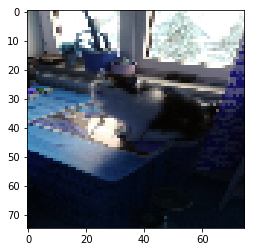

label:  cats_20160104_105839000_iOS prediction: dog


In [28]:
analyse_sample(pet_data, 50)

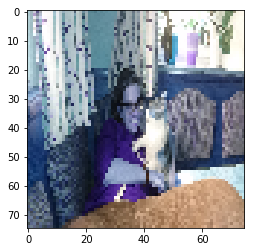

label:  cats_DSC_0029 prediction: dog


In [29]:
analyse_sample(pet_data, 23)

# LIME

In [30]:
import lime
from lime import lime_image
from lime import lime_base
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries

In [60]:
plt.rcParams['figure.figsize'] = [10, 5]

In [31]:
explainer = lime_image.LimeImageExplainer()

In [65]:
def explain_single_sample(dataset, idx):
    img_data = dataset[idx][0]
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    model_out = model.predict([data])[0]
    label = 0
    label_name = "cat"
    if model_out[1] > 0.5:
        label = 1
        label_name = "dog"
    explanation = explainer.explain_instance(data, model.predict, top_labels=2, hide_color=None, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=True)
    fig, ax = plt.subplots(1,3)
    ax[0].imshow(img_data)
    #plt.subplot(1, 2, 1)
    ax[1].imshow(mark_boundaries(temp, mask))
    #plt.show()
    #plt.subplot(1, 2, 2)
    temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)
    ax[2].imshow(mark_boundaries(temp, mask))
    plt.show()
    print("label: ", dataset[idx][1], "prediction:", label_name)

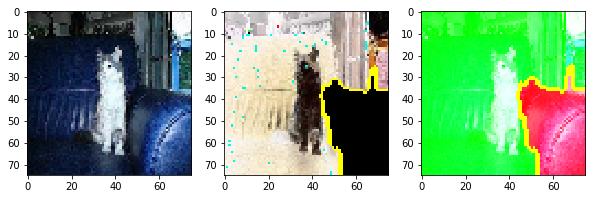

label:  cat prediction: dog


In [66]:
explain_single_sample(test_data, 0)

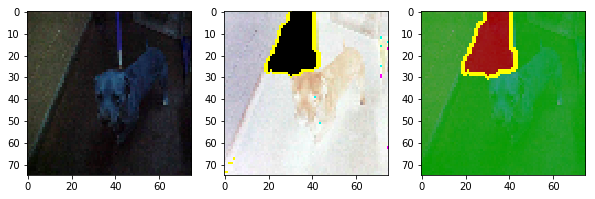

label:  dog prediction: dog


In [67]:
explain_single_sample(test_data, 3)

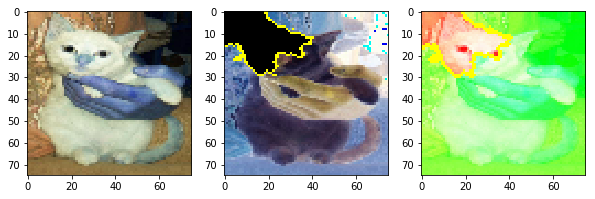

label:  cat prediction: dog


In [68]:
explain_single_sample(test_data, 100)

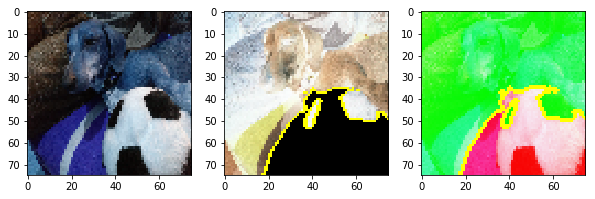

label:  dogs_IMG_20171224_155823_545 prediction: dog


In [69]:
explain_single_sample(pet_data, 1)

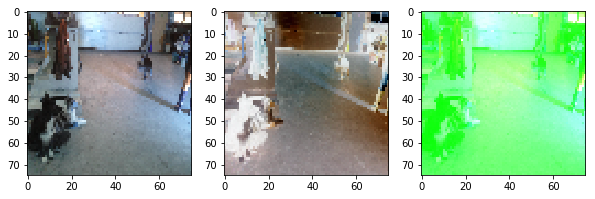

label:  dogs_20160108_145217228_iOS prediction: dog


In [72]:
explain_single_sample(pet_data, 100)

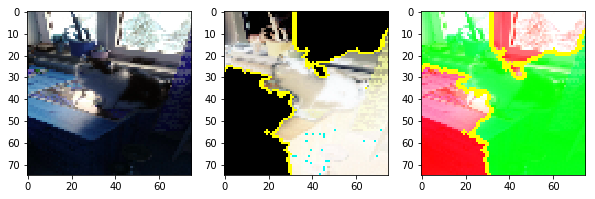

label:  cats_20160104_105839000_iOS prediction: dog


In [73]:
explain_single_sample(pet_data, 50)

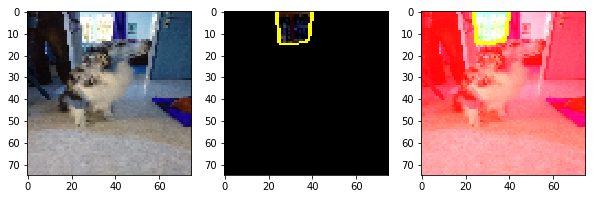

label:  dogs_DSC_1034 prediction: cat


In [74]:
explain_single_sample(pet_data, 255)